In [1]:
from datasets import (
    create_valid_dataset_multi, create_valid_loader
)
from datasets_DDSM import (
    create_test_dataset_DDSM_multi
)
from models_multiview.create_multiview_model import create_model
from torch_utils import utils
from torchmetrics.detection.mean_ap import MeanAveragePrecision
from pprint import pprint
from tqdm import tqdm
from utils import transforms as T
import torch
import argparse
import yaml
import torchvision
import torchvision.transforms.functional as F
import time
import numpy as np
from torch_utils import froc
import matplotlib.pyplot as plt
import cv2
torch.multiprocessing.set_sharing_strategy('file_system')
from typing import Dict, List, Optional, Tuple, Union

In [2]:
data_configs= {
    'TRAIN_DIR_IMAGES' : '../VinDr_Mammo/physionet.org/files/vindr-mammo/1.0.0/images/',
    'TRAIN_DIR_LABELS' : '../VinDr_Mammo/physionet.org/files/vindr-mammo/1.0.0/',
    'VALID_DIR_IMAGES' : '../VinDr_Mammo/physionet.org/files/vindr-mammo/1.0.0/images/',
    'VALID_DIR_LABELS' : '../VinDr_Mammo/physionet.org/files/vindr-mammo/1.0.0/',
# Class names.
    'CLASSES' :[
    '__background__',
    'Mass',


],

# Number of classes (object classes + 1 for background class in Faster RCNN).
    'NC' : 2,

# Whether to save the predictions of the validation set while training.
    'SAVE_VALID_PREDICTION_IMAGES' : True,
}
data_configs

{'TRAIN_DIR_IMAGES': '../VinDr_Mammo/physionet.org/files/vindr-mammo/1.0.0/images/',
 'TRAIN_DIR_LABELS': '../VinDr_Mammo/physionet.org/files/vindr-mammo/1.0.0/',
 'VALID_DIR_IMAGES': '../VinDr_Mammo/physionet.org/files/vindr-mammo/1.0.0/images/',
 'VALID_DIR_LABELS': '../VinDr_Mammo/physionet.org/files/vindr-mammo/1.0.0/',
 'CLASSES': ['__background__', 'Mass'],
 'NC': 2,
 'SAVE_VALID_PREDICTION_IMAGES': True}

In [3]:
args={
    'model' : 'multiview_detector_swint',
    'weights' : 'outputs/training/multi_swint_crop_small_eval2_40/best_model.pth',
    'batch' : 1,
    'workers': 8,
    'device' : 'cuda:0',
    'imgsz' : (500, 1200),
    
}

In [4]:
try: # Use test images if present.
    VALID_DIR_IMAGES = data_configs['TEST_DIR_IMAGES']
    VALID_DIR_LABELS = data_configs['TEST_DIR_LABELS']
except: # Else use the validation images.
    VALID_DIR_IMAGES = data_configs['VALID_DIR_IMAGES']
    VALID_DIR_LABELS = data_configs['VALID_DIR_LABELS']
NUM_CLASSES = data_configs['NC']
CLASSES = data_configs['CLASSES']
NUM_WORKERS = args['workers']
DEVICE = args['device']
BATCH_SIZE = args['batch']

# Model configurations
IMAGE_SIZE = args['imgsz']

# Load the pretrained model
create_model1 = create_model[args['model']]
if args['weights'] is None:
    model = create_model1(num_classes=NUM_CLASSES, norm = None,size= IMAGE_SIZE, coco_model=False)


# Load weights.
if args['weights'] is not None:
    model = create_model1(num_classes=NUM_CLASSES, norm = None,size= IMAGE_SIZE, coco_model=False)
    checkpoint = torch.load(args['weights'], map_location=DEVICE)
    model.load_state_dict(checkpoint['model_state_dict'])
    valid_dataset = create_valid_dataset_multi(
        VALID_DIR_IMAGES, 
        VALID_DIR_LABELS, 
        IMAGE_SIZE, 
        CLASSES,
    )
model.to(DEVICE).eval()

valid_loader = create_valid_loader(valid_dataset, BATCH_SIZE, NUM_WORKERS)



1000
     index                          study_id  \
0        6  5683854eafabc34f6d854000d2ac6c2d   
1        7  5683854eafabc34f6d854000d2ac6c2d   
2       18  917a4de3b1f921f1c9fa98b7a61d749d   
3       19  917a4de3b1f921f1c9fa98b7a61d749d   
4       20  31fa226bc9f87e0a2cb2de6dddbc2270   
..     ...                               ...   
332   2246  b8acac150be7f949f78dc631a3851f8b   
333   2247  b8acac150be7f949f78dc631a3851f8b   
334   2249  b8acac150be7f949f78dc631a3851f8b   
335   2250  b8acac150be7f949f78dc631a3851f8b   
336   2251  b8acac150be7f949f78dc631a3851f8b   

                             image_id  height  width         xmin  \
0    2f944efb1cb9579442df2d7fe6a579b7    3518   2800   142.899002   
1    7385e8cf7b29764525c81de4aa1aebe4    3518   2800   142.899002   
2    4dd8faf113a9421e03a6e2bcd4238da2    3518   2800   153.445999   
3    19056b152c5d2ed98f66de006fa45a6c    3518   2800   141.677002   
4    625aa350502a7038cfe5f9ca5f1a65f4    3518   2800   192.143005   
..  

  0%|                                                                                                                                                                                                             | 0/2000 [00:00<?, ?it/s]

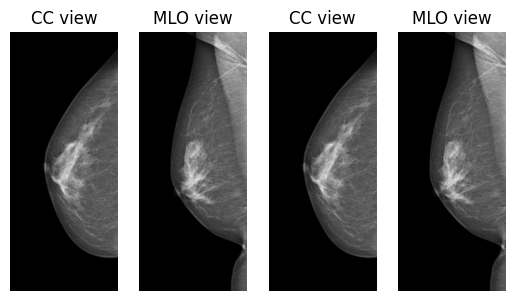

  0%|                                                                                                                                                                                                   | 1/2000 [00:03<2:00:13,  3.61s/it]

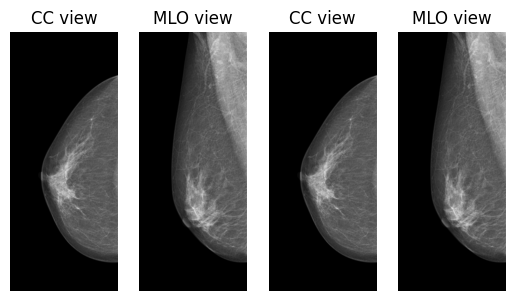

  0%|▏                                                                                                                                                                                                  | 2/2000 [00:04<1:05:13,  1.96s/it]

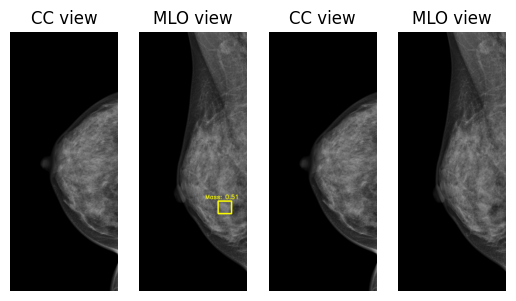

  0%|▎                                                                                                                                                                                                    | 3/2000 [00:04<43:52,  1.32s/it]

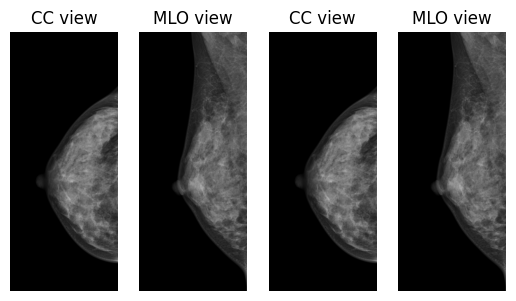

  0%|▍                                                                                                                                                                                                    | 4/2000 [00:05<34:04,  1.02s/it]

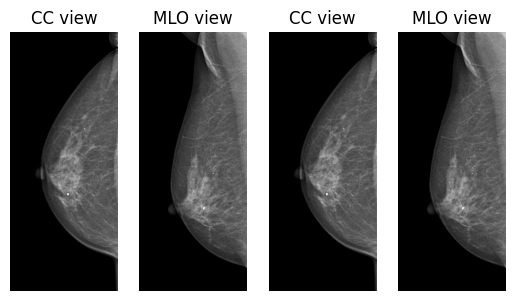

  0%|▍                                                                                                                                                                                                    | 5/2000 [00:06<28:04,  1.18it/s]

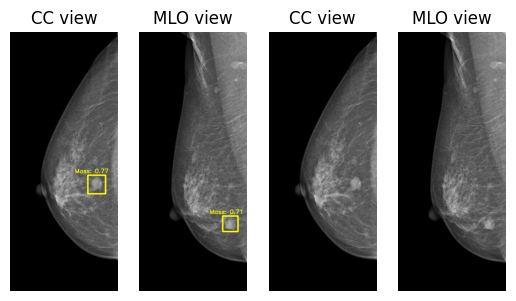

  0%|▌                                                                                                                                                                                                    | 6/2000 [00:06<24:02,  1.38it/s]

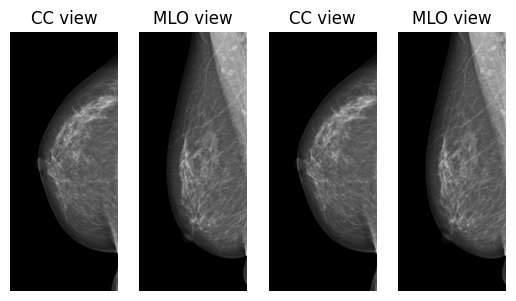

  0%|▋                                                                                                                                                                                                    | 7/2000 [00:07<21:41,  1.53it/s]

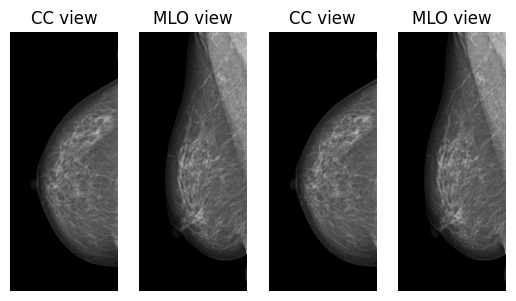

  0%|▊                                                                                                                                                                                                    | 8/2000 [00:07<20:01,  1.66it/s]

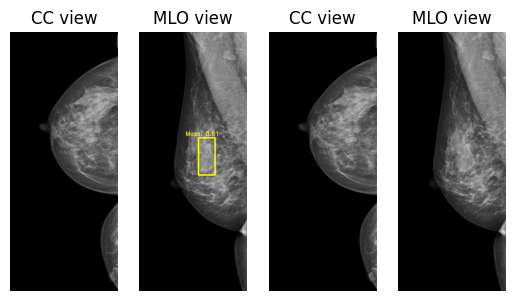

  0%|▉                                                                                                                                                                                                    | 9/2000 [00:08<18:54,  1.76it/s]

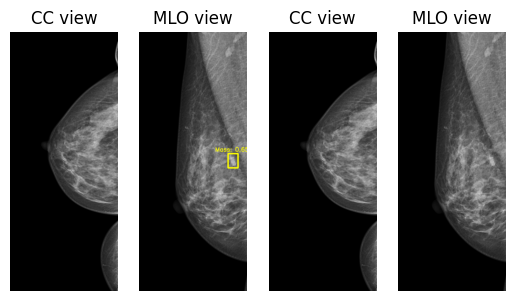

  0%|▉                                                                                                                                                                                                   | 10/2000 [00:08<17:56,  1.85it/s]

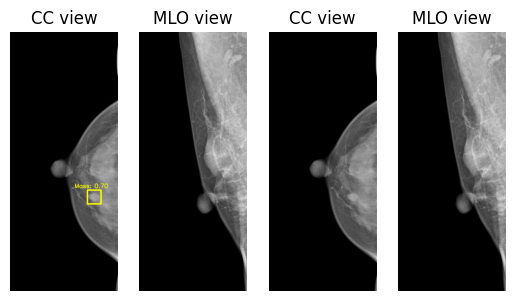

  1%|█                                                                                                                                                                                                   | 11/2000 [00:09<21:45,  1.52it/s]

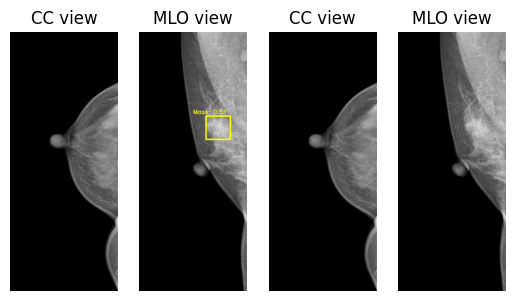

  1%|█▏                                                                                                                                                                                                  | 12/2000 [00:09<19:59,  1.66it/s]

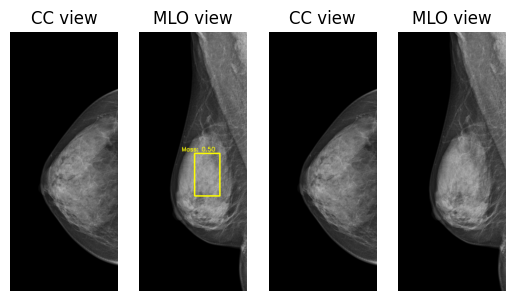

  1%|█▎                                                                                                                                                                                                  | 13/2000 [00:10<18:47,  1.76it/s]

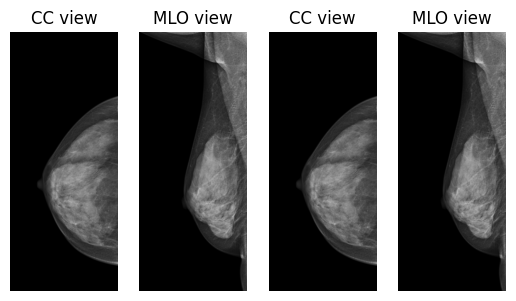

  1%|█▎                                                                                                                                                                                                  | 14/2000 [00:10<18:04,  1.83it/s]

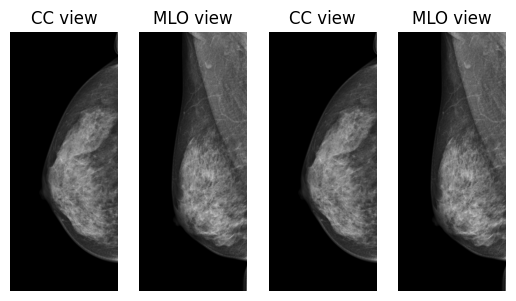

  1%|█▍                                                                                                                                                                                                  | 15/2000 [00:11<17:35,  1.88it/s]

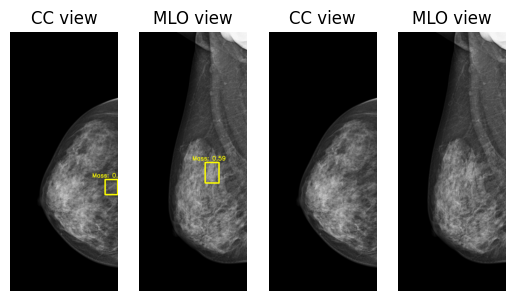

  1%|█▌                                                                                                                                                                                                  | 16/2000 [00:11<17:08,  1.93it/s]

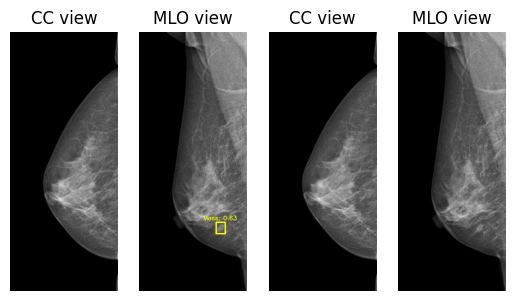

  1%|█▋                                                                                                                                                                                                  | 17/2000 [00:12<16:55,  1.95it/s]

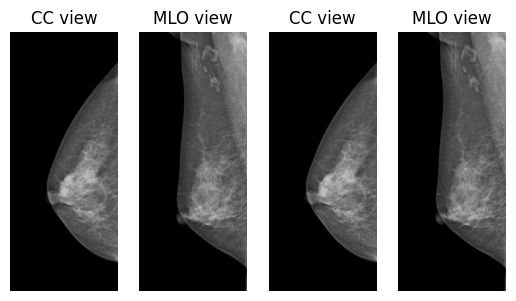

  1%|█▊                                                                                                                                                                                                  | 18/2000 [00:12<16:38,  1.99it/s]

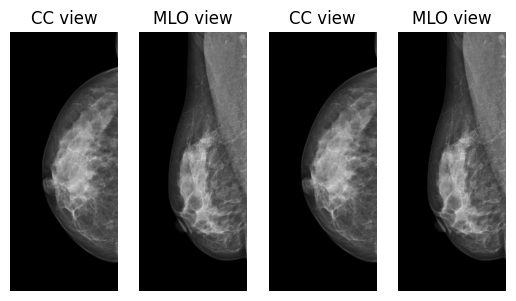

  1%|█▊                                                                                                                                                                                                  | 19/2000 [00:13<16:19,  2.02it/s]

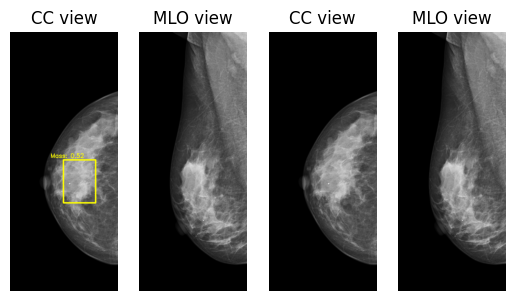

  1%|█▉                                                                                                                                                                                                  | 20/2000 [00:13<16:09,  2.04it/s]

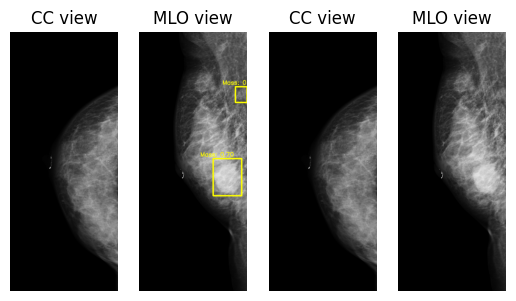

  1%|██                                                                                                                                                                                                  | 21/2000 [00:14<15:59,  2.06it/s]

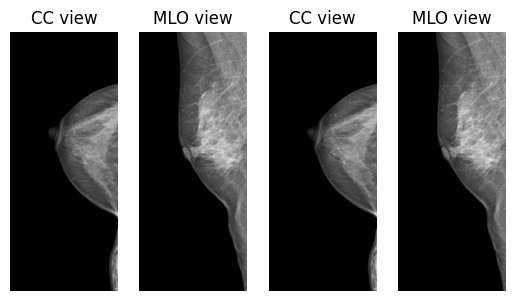

  1%|██▏                                                                                                                                                                                                 | 22/2000 [00:14<15:57,  2.07it/s]

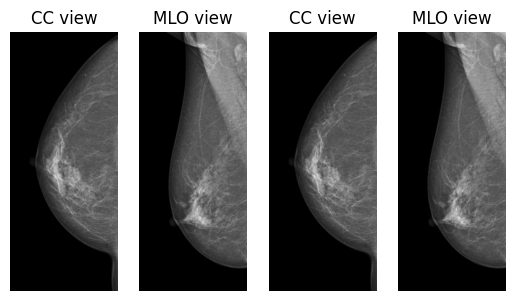

  1%|██▎                                                                                                                                                                                                 | 23/2000 [00:15<16:10,  2.04it/s]

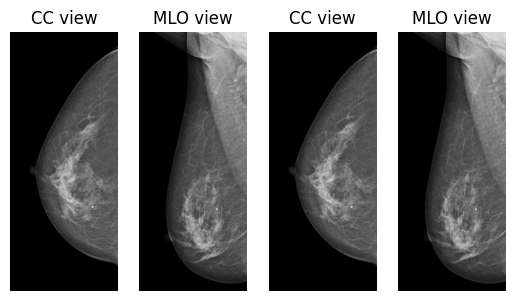

  1%|██▎                                                                                                                                                                                                 | 24/2000 [00:15<16:02,  2.05it/s]

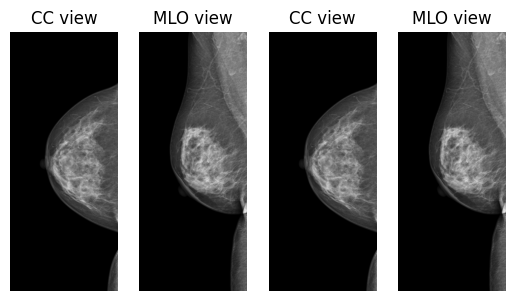

  1%|██▍                                                                                                                                                                                                 | 25/2000 [00:16<16:02,  2.05it/s]

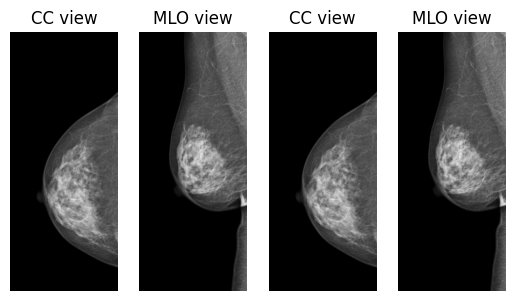

  1%|██▌                                                                                                                                                                                                 | 26/2000 [00:16<16:13,  2.03it/s]

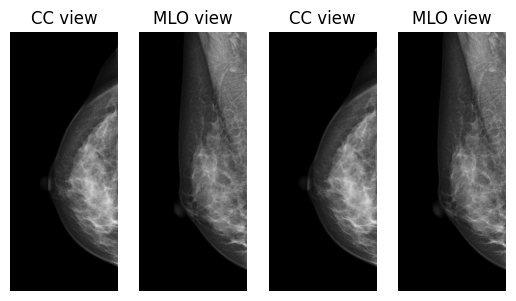

  1%|██▋                                                                                                                                                                                                 | 27/2000 [00:17<16:13,  2.03it/s]

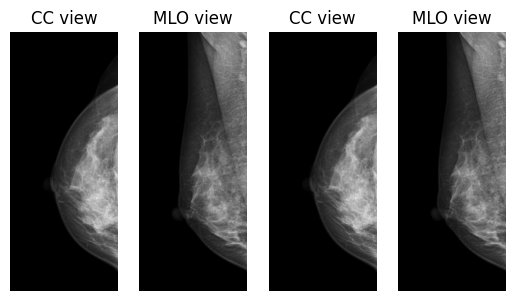

  1%|██▋                                                                                                                                                                                                 | 28/2000 [00:17<16:23,  2.01it/s]

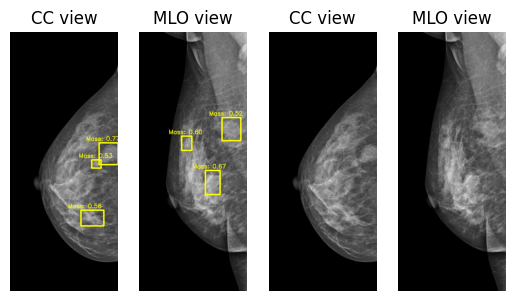

  1%|██▊                                                                                                                                                                                                 | 29/2000 [00:18<16:14,  2.02it/s]

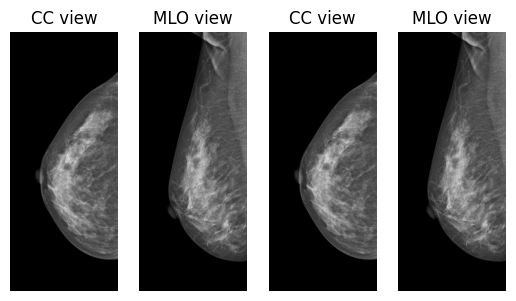

  2%|██▉                                                                                                                                                                                                 | 30/2000 [00:19<20:08,  1.63it/s]

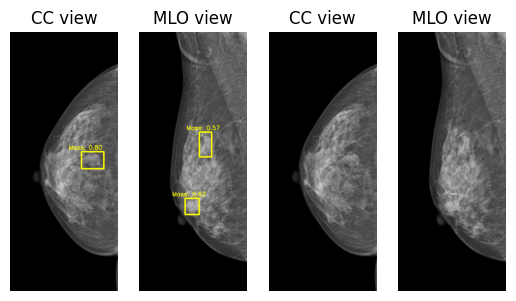

  2%|███                                                                                                                                                                                                 | 31/2000 [00:19<18:42,  1.75it/s]

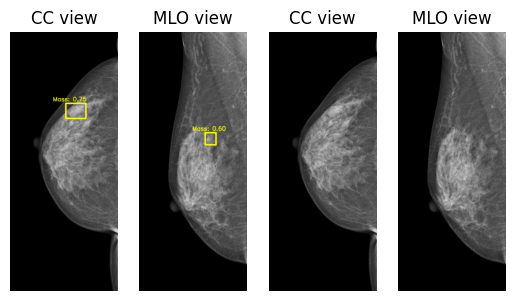

  2%|███▏                                                                                                                                                                                                | 32/2000 [00:20<17:46,  1.85it/s]

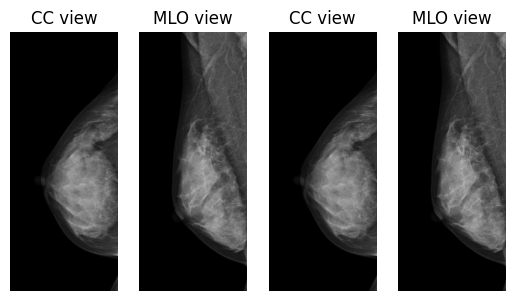

  2%|███▏                                                                                                                                                                                                | 33/2000 [00:20<17:21,  1.89it/s]

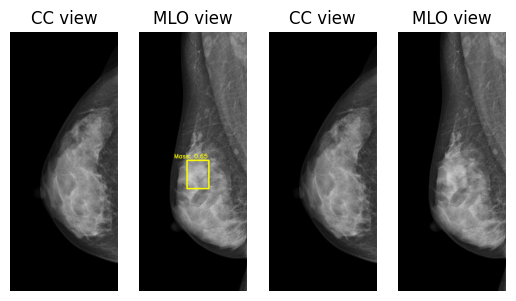

  2%|███▎                                                                                                                                                                                                | 34/2000 [00:21<16:52,  1.94it/s]

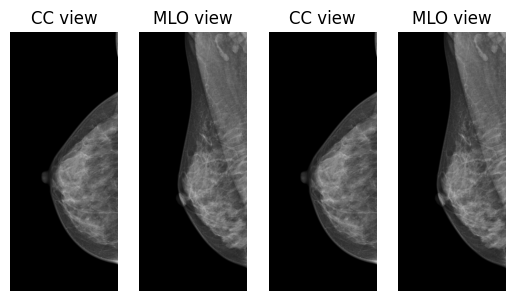

  2%|███▍                                                                                                                                                                                                | 35/2000 [00:21<16:34,  1.98it/s]

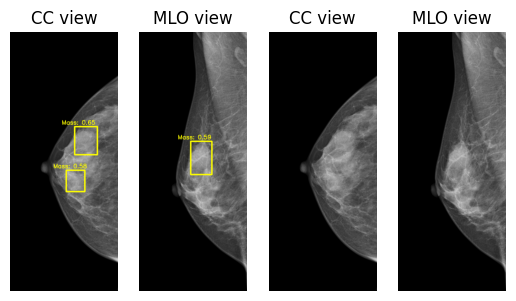

  2%|███▌                                                                                                                                                                                                | 36/2000 [00:22<16:19,  2.01it/s]

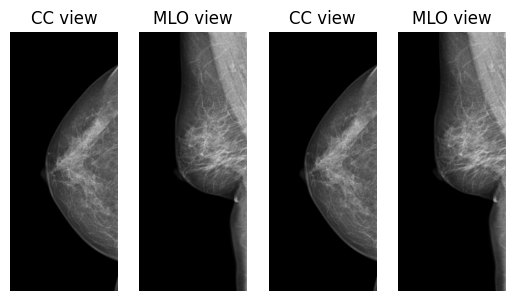

  2%|███▋                                                                                                                                                                                                | 37/2000 [00:22<16:16,  2.01it/s]

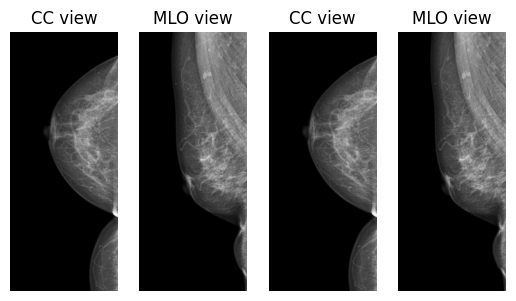

  2%|███▋                                                                                                                                                                                                | 38/2000 [00:23<16:03,  2.04it/s]

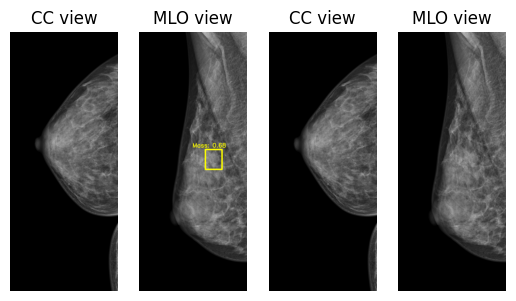

  2%|███▊                                                                                                                                                                                                | 39/2000 [00:23<16:02,  2.04it/s]

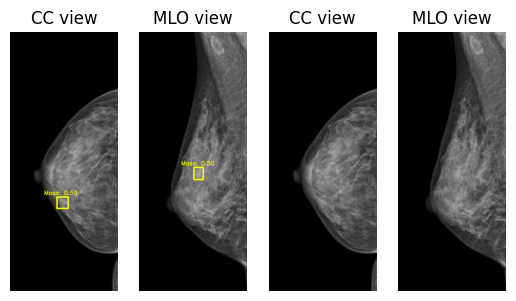

  2%|███▉                                                                                                                                                                                                | 40/2000 [00:23<15:57,  2.05it/s]

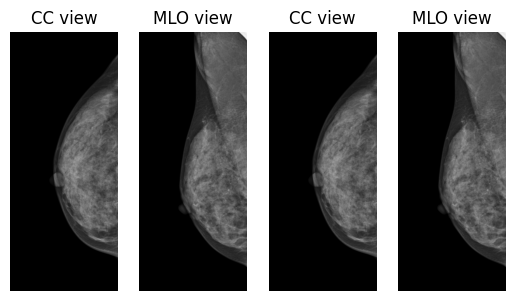

  2%|████                                                                                                                                                                                                | 41/2000 [00:24<15:52,  2.06it/s]

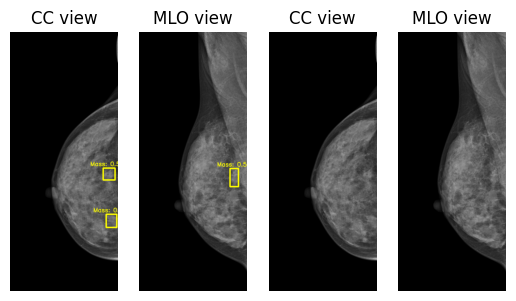

  2%|████                                                                                                                                                                                                | 42/2000 [00:24<15:50,  2.06it/s]

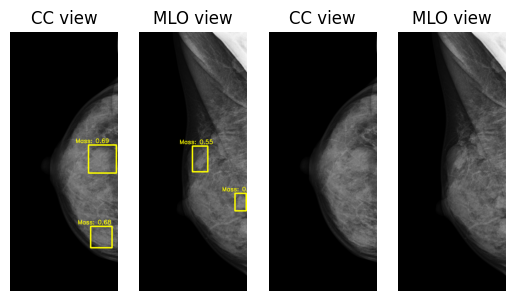

  2%|████▏                                                                                                                                                                                               | 43/2000 [00:25<15:44,  2.07it/s]

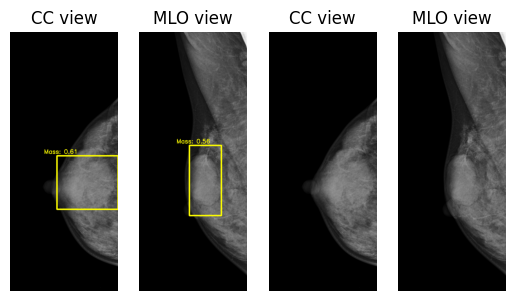

  2%|████▎                                                                                                                                                                                               | 44/2000 [00:25<15:40,  2.08it/s]

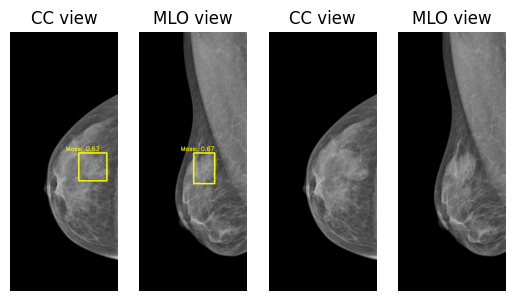

  2%|████▍                                                                                                                                                                                               | 45/2000 [00:26<15:38,  2.08it/s]

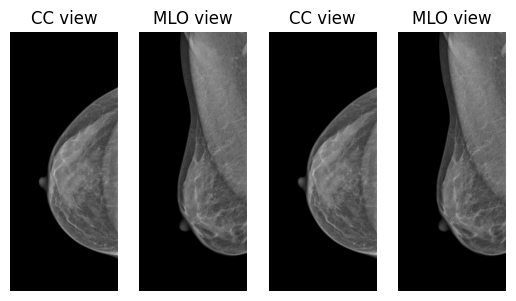

  2%|████▌                                                                                                                                                                                               | 46/2000 [00:26<15:45,  2.07it/s]

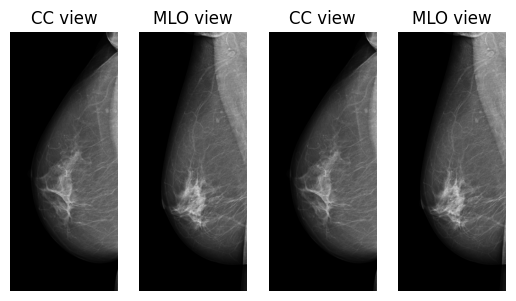

  2%|████▌                                                                                                                                                                                               | 47/2000 [00:27<15:44,  2.07it/s]

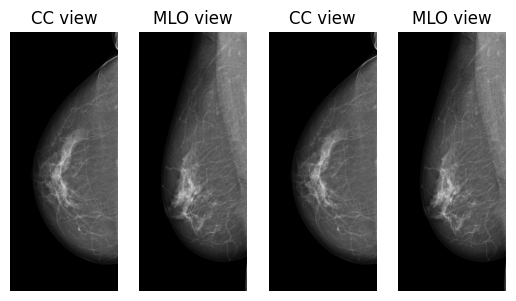

  2%|████▋                                                                                                                                                                                               | 48/2000 [00:28<19:34,  1.66it/s]

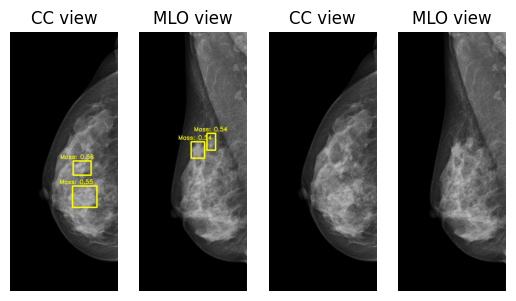

  2%|████▊                                                                                                                                                                                               | 49/2000 [00:28<18:04,  1.80it/s]

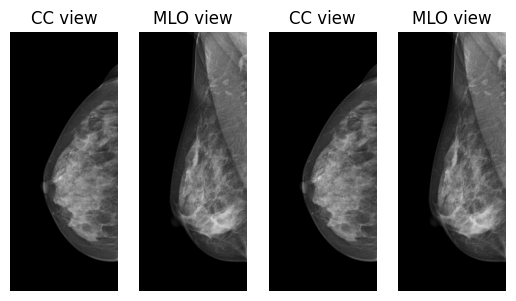

  2%|████▉                                                                                                                                                                                               | 50/2000 [00:29<17:23,  1.87it/s]

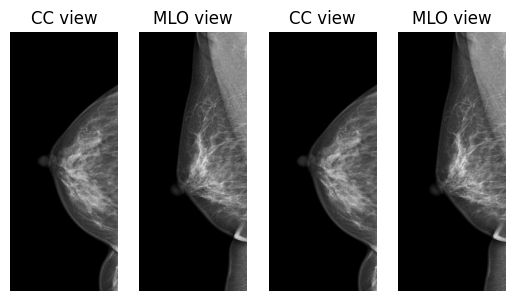

  3%|████▉                                                                                                                                                                                               | 51/2000 [00:29<16:55,  1.92it/s]

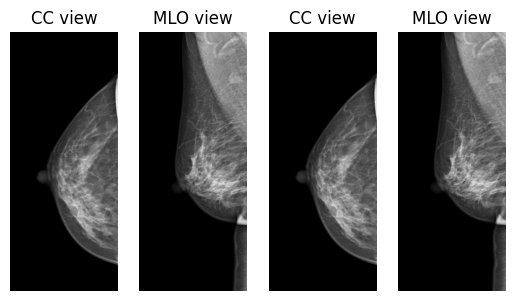

  3%|█████                                                                                                                                                                                               | 52/2000 [00:30<16:45,  1.94it/s]

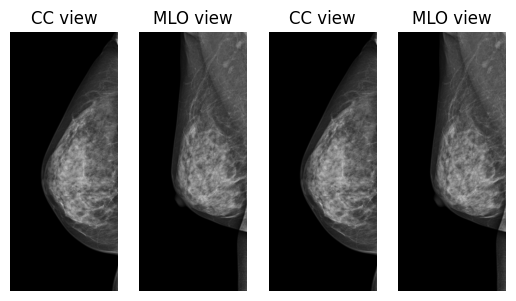

  3%|█████▏                                                                                                                                                                                              | 53/2000 [00:30<16:29,  1.97it/s]

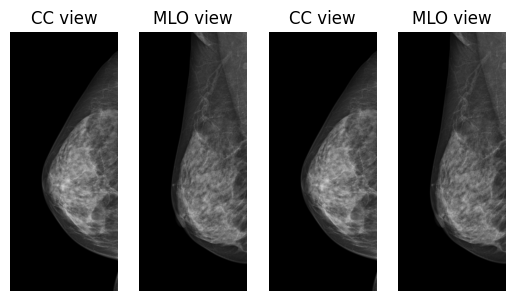

  3%|█████▎                                                                                                                                                                                              | 54/2000 [00:31<16:29,  1.97it/s]

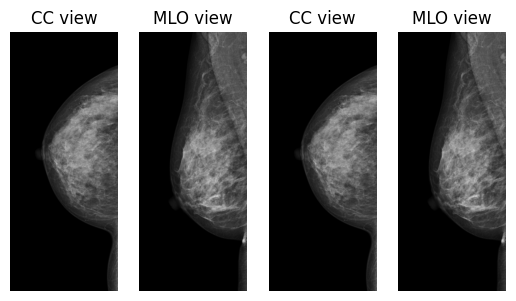

  3%|█████▍                                                                                                                                                                                              | 55/2000 [00:31<16:12,  2.00it/s]

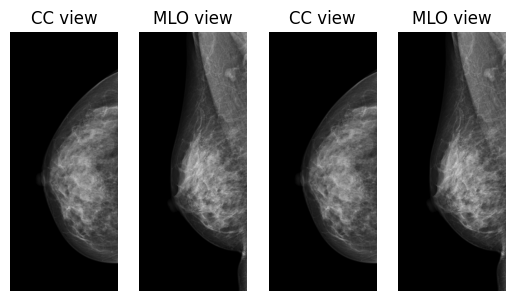

  3%|█████▍                                                                                                                                                                                              | 56/2000 [00:32<18:57,  1.71it/s]


KeyboardInterrupt: 

In [11]:
device='cuda'
model.roi_heads.score_thresh =0.5
for images_CC, images_MLO, targets_CC, targets_MLO in tqdm(valid_loader):
    images_CC = list(image_CC.to(device) for image_CC in images_CC)
    images_MLO = list(image_MLO.to(device) for image_MLO in images_MLO)
    #images = torch.stack(images)
    #print(images.shape)
    #images = images.to(device)
    targets_CC = [{k: v.to(device) for k, v in t.items()} for t in targets_CC]
    targets_MLO = [{k: v.to(device) for k, v in t.items()} for t in targets_MLO]

    if torch.cuda.is_available():
        torch.cuda.synchronize()
    model_time = time.time()
    with torch.no_grad():
        outputs_CC, outputs_MLO= model(images_CC, images_MLO, targets_CC, targets_MLO)
        #print('out',outputs)
        #print('tar',targets)
    #####################################
    for i in range(len(images_CC)):
        true_dict_CC = dict()
        true_dict_MLO = dict()
        preds_dict_CC = dict()
        preds_dict_MLO = dict()
        true_dict_CC['boxes'] = targets_CC[i]['boxes'].detach().cpu()
        true_dict_CC['labels'] = targets_CC[i]['labels'].detach().cpu()
        preds_dict_CC['boxes'] = outputs_CC[i]['boxes'].detach().cpu()
        preds_dict_CC['scores'] = outputs_CC[i]['scores'].detach().cpu()
        preds_dict_CC['labels'] = outputs_CC[i]['labels'].detach().cpu()
        
        true_dict_MLO['boxes'] = targets_MLO[i]['boxes'].detach().cpu()
        true_dict_MLO['labels'] = targets_MLO[i]['labels'].detach().cpu()
        preds_dict_MLO['boxes'] = outputs_MLO[i]['boxes'].detach().cpu()
        preds_dict_MLO['scores'] = outputs_MLO[i]['scores'].detach().cpu()
        preds_dict_MLO['labels'] = outputs_MLO[i]['labels'].detach().cpu()
        img_CC = images_CC[i]
        img_MLO = images_MLO[i]
        #img = invTrans(img)[0]
        img_CC= img_CC.permute(1,2,0)
        img_MLO = img_MLO.permute(1,2,0)
        img_CC = img_CC.cpu().numpy().copy()
        img_MLO = img_MLO.cpu().numpy().copy()
        img_CC1 = img_CC.copy()
        img_MLO1 = img_MLO.copy()
        #plt.imshow(img)
        count=0
        for j, label in enumerate(preds_dict_CC['labels']):
            if  label ==1:
                #count+=1
                x_min, y_min, x_max, y_max = preds_dict_CC['boxes'][j]
                img_CC =cv2.rectangle(img=img_CC,pt1= (int(x_min),int(y_min)),pt2= (int(x_max),int(y_max)), color = (1.0,1.0,0),thickness =5)
                score= preds_dict_CC['scores'][j]
                img_CC= cv2.putText(img_CC, f'Mass: {score:.2f}', (int(x_min)-60,int(y_min)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (1.0,1.0,0), 2)
                
                
                #             elif label ==2:
#                 #count+=1
#                 x_min, y_min, x_max, y_max = preds_dict_CC['boxes'][j]
#                 img_CC =cv2.rectangle(img=img_CC,pt1= (int(x_min),int(y_min)),pt2= (int(x_max),int(y_max)), color = (1.0,0,0),thickness =5)
        
        for j, label in enumerate(true_dict_CC['labels']):
            if  label >0:
                count+=1
#                 x_min, y_min, x_max, y_max = true_dict_CC['boxes'][j]
#                 img_CC1 =cv2.rectangle(img = img_CC1,pt1= (int(x_min),int(y_min)),pt2= (int(x_max),int(y_max)), color = (1.0,1.0,0),thickness =5)
# abs#             elif label ==2: 
#                 count+=1
#                 x_min, y_min, x_max, y_max = true_dict_CC['boxes'][j]
#                 img_CC1 =cv2.rectangle(img = img_CC1,pt1= (int(x_min),int(y_min)),pt2= (int(x_max),int(y_max)), color = (1.0,0,0),thickness =5)
        
        
        for j, label in enumerate(preds_dict_MLO['labels']):
            if  label ==1:
                count+=1
                x_min, y_min, x_max, y_max = preds_dict_MLO['boxes'][j]
                img_MLO =cv2.rectangle(img=img_MLO,pt1= (int(x_min),int(y_min)),pt2= (int(x_max),int(y_max)), color = (1.0,1.0,0),thickness =5)
                score= preds_dict_MLO['scores'][j]
                img_MLO= cv2.putText(img_MLO, f'Mass: {score:.2f}', (int(x_min)-60 ,int(y_min)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (1.0,1.0,0), 2)
                
# #             elif label ==2:
#                 #count+=1
#                 x_min, y_min, x_max, y_max = preds_dict_MLO['boxes'][j]
#                 img_MLO =cv2.rectangle(img=img_MLO,pt1= (int(x_min),int(y_min)),pt2= (int(x_max),int(y_max)), color = (1.0,0,0),thickness =5)
        
        for j, label in enumerate(true_dict_MLO['labels']):
            if  label ==1:
                count+=1
#                 x_min, y_min, x_max, y_max = true_dict_MLO['boxes'][j]
#                 img_MLO1 =cv2.rectangle(img = img_MLO1,pt1= (int(x_min),int(y_min)),pt2= (int(x_max),int(y_max)), color = (1.0,1.0,0),thickness =5)
# #             elif label ==2: 
#                 count+=1
#                 x_min, y_min, x_max, y_max = true_dict_MLO['boxes'][j]
#                 img_MLO1 =cv2.rectangle(img = img_MLO1,pt1= (int(x_min),int(y_min)),pt2= (int(x_max),int(y_max)), color = (1.0,0,0),thickness =5)        
        
        fig, axs= plt.subplots(1,4)
        axs[0].imshow(img_CC)
        axs[0].axis('off')
        axs[0].set_title("CC view")
        axs[1].imshow(img_MLO)
        axs[1].axis('off')
        axs[1].set_title("MLO view")
        axs[2].imshow(img_CC1)
        axs[2].axis('off')
        axs[2].set_title("CC view")
        axs[3].imshow(img_MLO1)
        axs[3].set_title("MLO view")
        axs[3].axis('off')
        plt.show()
    

In [ ]:
np.linspace(0,1,10)

In [ ]:
img = np.zeros((100,100,3))
img =cv2.rectangle(img =img,pt1= (40,40),pt2= (80,80), color = (0,0,1.0),thickness =5)
plt.imshow(img)